# kNN 算法  

又称 **k近邻（Nearest Neighbor）** 算法。  
特点：  
* 思想极度简单  
* 数学少  
* 效果好

<img src='resource/KNN_example.png'>

```kNN算法思想```：   

x和y坐标轴分别表示了数据样本的两个特征值。所有的数据样本分为两种类型。那么当新来一个未知分类的样本，我们如何将它分类？  

假如k设定为3，那么我们需要找出离新样本点距离最近（相似度最高）的三个样本点，新样本点的分类和三个样本点出现概率更高的分类结果相同。kNN的本质是说两个样本如果有很高的相似程度，那么我们认为它们属于同一个类别。使用特征空间中两个样本点的距离两个样本的相似度。  

kNN既可以解决分类问题，也可以解决回归问题。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* raw_data_X: 原始特征数据  
* raw_data_y: 数据标签

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [4]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [5]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [6]:
X_train.shape

(10, 2)

In [7]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

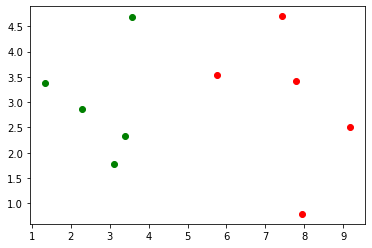

In [8]:
# 红色的点代表标签为1的点，绿色的点代表标签为0的点
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.show()

* 随机产生一个新的样本点

In [16]:
# 随机产生一组数据
x = 5 * np.random.random_sample(2)
x

array([0.5237031 , 3.67599026])

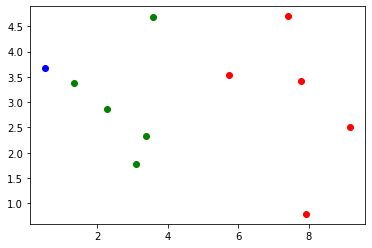

In [17]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.scatter(x[0],x[1],color='b')
plt.show()

## kNN 的过程

计算每一个点到当前 x 点（待预测）的距离:  欧拉公式  
<img src="resource/欧拉公式.png">
<img src="resource/欧拉公式2.png" zoom="50%">

第a个样本点的第1个特征和第b个样本点的第1个特征。。。

In [49]:
distances = np.sqrt(np.sum((x - X_train)**2,axis=1))

In [50]:
distances

array([3.16925675, 3.20597176, 0.87590479, 3.21890764, 1.93399406,
       6.97479849, 5.22327947, 8.7265642 , 7.27344374, 7.95727934])

In [51]:
# 对这些距离从小到大排序，并返回它们在 distances 数组中的索引
nearest = np.argsort(distances)
nearest

array([2, 4, 0, 1, 3, 6, 5, 8, 9, 7], dtype=int64)

取出离 x 最近的前 k 个点的值，存放到列表 topK_y 中

In [52]:
k = 6
topK_y = y_train[nearest[:k]]
topK_y

array([0, 0, 0, 0, 0, 1])

统计 topK_y 中两种标签的出现次数

In [53]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({0: 5, 1: 1})

In [54]:
votes.most_common(1) # 选择出现次数更多的那个标签，作为 x 的标签

[(0, 5)]

In [57]:
votes.most_common(1)[0][0]

0

In [58]:
predict_y = votes.most_common(1)[0][0]
predict_y

0

```课堂任务```  

将以上过程写成一个函数 kNN_classify(k,X_train,y_train,x) 
* k: k近邻  
* X_train: 输入数据集的特征矩阵
* y_train: 输入数据集的目标向量
* x: 待预测的 x 值
* return x 的标签

In [60]:
import numpy as np
from collections import Counter

def kNN_classify(k, X_train, y_train, x):
    """
    kNN 算法进行分类
    """
    assert k >= 1 and k <= X_train.shape[0],'k must be valid'
    assert X_train.shape[0] == y_train.shape[0],\
    "the size of X_train must equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0], \
    "the number of features of x must equal to X_train's"
    
    distances = np.sqrt(np.sum((x-X_train)**2,axis=1))
    nearest = np.argsort(distances)
    topK = y_train[nearest[:k]]
    votes = Counter(topK)
    return votes.most_common(1)[0][0]



0